# ICFO Challenge: QUANTUM SIMULATION WITH QUANTUM COMPUTERS

Barcelona, April 1-2, 2023

&nbsp;

---

_Greetings, brave heroes! Welcome to the **Qiskit Hackathon Barcelona**._

_Unlike the latest blockbuster on the cinemas right now, the challenges you shall face here are no "mania" jokes.
The nuclear core in our hidden research facilities is destabilized.
Your elite team will venture into the core of our underground advanced lab to deal with this emergency situation (or die trying).
We estimate a maximum of 24h before it collapses and the radioactive debris ruin the world's surface.
Should you succeed, we'll all be safe and you'll be rewarded with great honour.
Should you fail, it'll all be lost!
But fear not, as the power of real quantum computers will be at your fingertips, allowing you to run actual lab experiments on remote IBM Q processors.
With great teamwork no challenge will remain unbeaten._

_The evacuation is nearly complete and most of the big-shots are already heading towards their space shuttles.
Yes, this is the dimension of the potential catastrophe. No pressure, though.
As you head down the facility, contention gates keep shutting down behind you.
At the bottom, you encounter your first challenge: the contention gate leading to the core has already been sealed in what looks like a futile and desperate attempt to contain the disaster._

_The breaching expert in the team gets to work.
However, bypassing this security gate seems more cumbersome than expected.
Just as she seems completely out of options, a wild idea crosses her mind: if you knew the magnetic properties of the security system's board, she would have the perfect tool to alter them and break the gate open._

---

# CONTENTS <a class="anchor" id="0"></a>

* [1. SPINS IN THE GROUND-STATE: THE XXZ HEISENBERG MODEL](#1)
* [2. FERMIONS IN EXCITED STATES: THE LITHIUM HYDRATE MOLECULE](#2)
* [3. MASTER THE QUANTUM SIMULATION SHENANIGANS](#3)
* [REFERENCES](#REF)

---

# 1. SPINS IN THE GROUND STATE: THE XXZ HEISENBERG MODEL <a class="anchor" id="1"></a> [[↑]](#0)

_The quantum physicist in your unit, Seedis, gets to work.
He kneels down and opens the heavy backpack he's been carrying.
It's an actual quantum computer.
"Let's simulate the hell out of it! What're you lookin' at? Chop chop. There's no time to waste!"_

> In this first task, you will study a spin system, a prototypical problem in condensed matter physics. You will find that spins can manifest different phases and behaviours even when they rest at their ground state.

To simulate a quantum system, we need to determine the interactions between the quantum particles that constitute it by defining its Hamiltonian operator.
The security system's board contains rings that follow the XXZ Heisenberg model [[Ref.1]](#REF)<a class="anchor" id="Ref1"></a>, given by

$$ H_{XXZ} = -\frac{1}{4}\sum_{i=1}^N \sigma_i^x\sigma_{i+1}^x + \sigma_i^y\sigma_{i+1}^y + \Delta \, \sigma_i^z\sigma_{i+1}^z \,.$$

Here, $N$ is the number of spin-1/2 particles, $\Delta$ is the anisotropy parameter, and $\sigma^x_i$, $\sigma^y_i$, and $\sigma^z_i$ are Pauli operators, where the subscripts label the qubit they act on.
Furthermore, we impose the periodic boundary condition $\sigma^u_{i+N}=\sigma^u_{i}$ to make the object rest on a ring shape.
Note that only qubits next to each other interact.

This model captures a rich range of behaviours throughout its phase diagram.
First off, for $\Delta=1$, the model converges to the isotropic Heisenberg Hamiltonian (XXX), where all the terms have the same coupling strength.
As we vary $\Delta$, the system can be in three phases:

- $\Delta> 1$: the **ferromagnetic** phase, where all spins point in the same direction.
- $-1<\Delta<1$: the **paramagnetic** or critical phase, where the spins are completely disordered.
- $\Delta<-1$: the **anti-ferromagnetic** phase, where neighboring spins are anti-aligned.

We consider $N=12$ for all the calculations throughout this task, and vary $\Delta$ to see different physics.

## 1.1 - Ground state energy of the XXZ model

Quantum systems can be naturally found in their ground state (GS). 
Thus, the first step is to learn to prepare GSs with the quantum computer.
A prominent approach to do so is through the **Variational Quantum Eigensolver (VQE)** algorithm [[Ref. 2]](#REF)<a class="anchor" id="Ref2"></a>.

Interestingly, the energy spectrum of the $H_{XXZ}$ model can be obtained analytically using the _Bethe ansatz_. For $\Delta>1$, the system is in the _ferromagnetic phase_, in which all the spins in the GS point towards the same direction. This GS energy $\epsilon_{GS}$ is known to be:

$$\epsilon_{GS}=-N\frac{\Delta}{4}\,.$$

### Prepare a simple $N$-qubit state to represent a GS wave function in the ferromagnetic phase. Compute its energy taking the expectation value of the Hamiltonian to confirm the theoretical result $\epsilon_{GS}$ for $\Delta=4$.

> Tip: Qiskit's Heisenberg model implementation already assumes the particles have spin 1/2 and, thus, you do not need to put the 1/4 prefactor in the Hamiltonian definition. Don't forget the sign though!

In [1]:
from qiskit import *
from qiskit_nature.second_q.hamiltonians import HeisenbergModel
from qiskit_nature.second_q.hamiltonians.lattices import LineLattice, BoundaryCondition
from qiskit_nature.second_q.mappers import QubitConverter
from qiskit_nature.second_q.mappers import LogarithmicMapper

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.opflow import CircuitStateFn


In [2]:
def build_heisenbergModel(Delta, num_spins):
    line_latt = LineLattice(
        num_spins, boundary_condition=BoundaryCondition.PERIODIC)
    heisenberg = HeisenbergModel(line_latt, (-1, -1, -Delta))

    ham = LogarithmicMapper().map(heisenberg.second_q_op().simplify())
    return ham


qiskit.opflow.primitive_ops.pauli_sum_op.PauliSumOp

In [ ]:

Delta = 4.0
num_spins = 12

ham = build_heisenbergModel(Delta, num_spins)

init_state = Statevector.from_label('000000000000')
qc = QuantumCircuit(num_spins)
qc.initialize(init_state.data, range(num_spins))

# Convert the circuit to a StateFn object
state_fn = CircuitStateFn(qc)

# Convert the Hamiltonian to an Operator object
# ham_op = Operator(pauli_op)

# Compute the expectation value
state = Statevector.from_instruction(qc)
expectation_value = state.expectation_value(ham)
print(expectation_value.real)

State preparation is not always that straightforward.
In the _anti-ferromagmetic phase_ (for $\Delta<-1$), the GS wave function is more difficult to prepare, as it consists of a non-trivial superposition of the computational basis states.

In the VQE algorithm, we use a parameterized circuit to prepare the GS of our Hamiltonian.
We start with an initial guess of the circuit parameters and optimize them to minimize the expectation value of the Hamiltonian.
This naturally brings us (close) to the GS of the system, as it is, by definition, the state with the lowest energy.

Before diving into state preparation with VQE, create a baseline to evaluate the variational results.

### Use an exact numerical solver to obtain the GS energy for $\Delta=-2$

In [ ]:
ham = build_heisenbergModel(-2, 12)

In [ ]:
from qiskit.algorithms import NumPyMinimumEigensolver
from qiskit.opflow import PauliSumOp


numpy_solver = NumPyMinimumEigensolver()
result = numpy_solver.compute_minimum_eigenvalue(operator=ham)
ref_value = result.eigenvalue.real
print(f"Reference value: {ref_value:.5f}")

Option 2 (manual exact digitalization)

In [ ]:
import numpy as np
from scipy.sparse import csc_matrix, kron, csr_matrix, identity
from scipy.sparse.linalg import eigsh


global N 
global Delta

N =12
Delta = -2.

def get_pairs_X():
    sigma_x = csr_matrix(np.array([[0.,1.],[1.,0.]], dtype=complex))
    return kron(sigma_x, sigma_x) 

def get_pairs_Y():
    sigma_y = csr_matrix(np.array([[0.,-1.j],[1.j,0.]], dtype=complex))
    return kron(sigma_y, sigma_y)

def get_pairs_Z():
    sigma_z = csr_matrix(np.array([[1.,0.],[0.,-1.]], dtype = complex))
    return kron(sigma_z, sigma_z)

def build_hamiltonian():
    sigma_x = csr_matrix(np.array([[0.,1.],[1.,0.]], dtype=complex))
    sigma_y = csr_matrix(np.array([[0.,-1.j],[1.j,0.]], dtype=complex))
    sigma_z = csr_matrix(np.array([[1.,0.],[0.,-1.]], dtype = complex))
    Hx,Hy,Hz = csr_matrix((2**N,2**N),dtype=complex),csr_matrix((2**N,2**N),dtype=complex),csr_matrix((2**N,2**N),dtype=complex)

    for k in range(N-1):
        Hx0 = get_pairs_X()
        Hy0 = get_pairs_Y()
        Hz0 = get_pairs_Z()
        Hx += kron(kron(identity(2**k,format='csr'), Hx0), identity(2**(N-2-k),format='csr'))
        Hy += kron(kron(identity(2**k,format='csr'), Hy0), identity(2**(N-2-k),format='csr'))
        Hz += kron(kron(identity(2**k,format='csr'), Hz0), identity(2**(N-2-k),format='csr'))
    
    Hx += kron(kron(sigma_x, identity(2**(N-2),format='csr')), sigma_x)
    Hy += kron(kron(sigma_y, identity(2**(N-2),format='csr')), sigma_y)
    Hz += kron(kron(sigma_z, identity(2**(N-2),format='csr')), sigma_z)

    return (-0.25)*(Delta*Hz + Hx + Hy)

h = build_hamiltonian()
sparse_h = csc_matrix(h)
GE, GS = eigsh(sparse_h, k=1, which='SA')
E1, G1 = eigsh(sparse_h, k=2, which='SA')

h_teo = -N*Delta/4

print(E1[0])#groundstate delta =-2

Use the VQE algorithm to prepare the GS of the Hamiltonian for the same value of $\Delta$.
You should try to achieve the closest estimate to the actual GS energy using an **ansatz consisting of three layers of single- and two-qubit gates, where two-qubit gates connect only near neighbor qubits**.
Furthermore, among the different possibilities for the optimizers that you can choose from, use the **Simultaneous Perturbation Stochastic Approximation ([SPSA](https://qiskit.org/documentation/stubs/qiskit.algorithms.optimizers.SPSA.html)) optimizer**.

### Use the VQE algorithm to estimate the GS energy for $\Delta=-2$

In [ ]:
# define ansatz and optimizer
from qiskit.circuit.library import TwoLocal, PauliTwoDesign
from qiskit.algorithms.optimizers import SPSA

iterations = 300
ansatz = TwoLocal(ham.num_qubits, reps=3, rotation_blocks=[
                  "rx", "rz", "rx"], entanglement_blocks="cz", entanglement='circular')
# ansatz = PauliTwoDesign(num_spins, reps=1, seed=5, insert_barriers=True)
# ansatz.add_layer(TwoLocal(4, rotation_blocks="rz", entanglement_blocks="cz"))
spsa = SPSA(maxiter=iterations)


In [ ]:
ansatz.decompose().draw('mpl')


In [ ]:
from qiskit_aer.primitives import Estimator as AerEstimator


noiseless_estimator = AerEstimator()


In [ ]:
# instantiate and run VQE
from qiskit.algorithms.minimum_eigensolvers import VQE

counts = []
values = []



def store_intermediate_result(eval_count, parameters, mean, std):
    counts.append(eval_count)
    values.append(mean)

vqe = VQE(
    noiseless_estimator, ansatz, optimizer=spsa, callback=store_intermediate_result
)
result = vqe.compute_minimum_eigenvalue(operator=ham)

print(f"Reference value: {ref_value:.5f}")
print(f"VQE on Aer qasm simulator (no noise): {result.eigenvalue.real:.5f}")
print(
    f"Delta from reference energy value is {(result.eigenvalue.real - ref_value):.5f}"
)
print("number of iterations: ",len(counts))

## 1.2 - Ansatz expressibility

This method has several aspects that can be tuned, such as the shape of the ansatz or the optimization algorithm to find the parameters. These are important factors in more elaborate quantum simulations.
To better understand the role of these parameters, re-implement the method to solve the previous problem ($H_{XXZ}$ with $\Delta=-2$) and compare the results obtained with with different combinations of ansatze and classical optimizers.

 - **Ansatz**:
 
   - Alternating single- and two-qubit (controlled-Z) gate layers, with interactions between all qubit pairs in the two-qubit layers;
   - Alternating single- and two-qubit (controlled-Z) gate layers, in which two-qubit gates are applied only between neighbouring qubits.

 - **Optimizers**:
 
   - Simultaneous Perturbation Stochastic Approximation ([SPSA](https://qiskit.org/documentation/stubs/qiskit.algorithms.optimizers.SPSA.html));
   - Constrained Optimization By Linear Approximation ([COBYLA](https://qiskit.org/documentation/stubs/qiskit.algorithms.optimizers.COBYLA.html));
   - Sequential Least SQuares Programming ([SLSQP](https://qiskit.org/documentation/stubs/qiskit.algorithms.optimizers.SLSQP.html)).

For both types of ansatze above, fix only 3 layers of each type of gate. Compare the 6 different combinations of ansatz and optimizer to understand which one performs better both in terms of the accuracy error obtained, and the time and number of steps to converge.

### Plot the estimate of the GS energy as a function of the optimization steps for all the combinations of optimizer and ansatz listed above.

In [ ]:
# define ansatz and optimizer
from qiskit.circuit.library import TwoLocal
from qiskit.algorithms.optimizers import SPSA, COBYLA, SLSQP

iterations = 2000
ansatz = TwoLocal(ham.num_qubits, reps=3, rotation_blocks=[
                  "rx", "rz", "rx"], entanglement_blocks="cz", entanglement='circular')
ansatz_2 = TwoLocal(ham.num_qubits, reps=3, rotation_blocks=[
                    "rx", "rz", "rx"], entanglement_blocks="cz", entanglement='full')
ansatz_list = [(ansatz, "circular"), (ansatz_2, "full")]


spsa = SPSA(maxiter=iterations)
cobyla = COBYLA(maxiter=iterations)

iterations = 30
slsqp = SLSQP(maxiter=iterations)
optimizer_list = [(spsa, "spas"), (cobyla, "cobyla"), (slsqp, "slsqp")]


In [ ]:
ansatz_list[0][0].decompose().draw('mpl')


In [ ]:
ansatz_list[1][0].decompose().draw('mpl')


In [ ]:
import matplotlib.pyplot as plot
print(f"Reference value: {ref_value:.5f}")
print()

# define callback
# note: Re-run this cell to restart lists before training
counts = []
values = []


def store_intermediate_result(eval_count, parameters, mean, std):
    counts.append(eval_count)
    values.append(mean)


d = {}
for ansatz, ansatz_name in ansatz_list:
    for optimizer, optimizer_name in optimizer_list:
        counts = []
        values = []

        # instantiate and run VQE
        vqe = VQE(
            noiseless_estimator, ansatz, optimizer=optimizer, callback=store_intermediate_result
        )
        result = vqe.compute_minimum_eigenvalue(operator=ham)

        print(ansatz_name, optimizer_name)
        err = result.eigenvalue.real - ref_value
        num_iter = len(counts)

        d[ansatz_name] = {}
        d[ansatz_name][optimizer_name] = {}
        d[ansatz_name][optimizer_name]["error"] = err
        d[ansatz_name][optimizer_name]["num_iter"] = num_iter

        print(
            f"VQE on Aer qasm simulator (no noise): {result.eigenvalue.real:.5f}")
        print(f"Delta from reference energy value is {err:.5f}")
        print("number of iterations: ", num_iter)

        plot.rcParams["figure.figsize"] = (12, 4)
        plot.plot(counts, values, label=optimizer_name+" "+ansatz_name)
        plot.xlabel("Eval count")
        plot.ylabel("Energy")
        plot.title("Convergence with no noise")

plot.legend()
plot.show()


## 1.3 - Phase diagram

As we have introduced above, the full phase diagram of the $H_{XXZ}$ model encompasses a rich range of behaviours:

- For $\Delta>1$, we have a **ferromagnetic** phase.
- For $-1<\Delta<1$, we have a **paramagnetic** phase.
- For $\Delta\leq-1$, we have an **anti-ferromagnetic** phase.

Use the best combination of optimizer and ansatz that you have found before to prepare the GS of the system for different values of $\Delta$ to reconstruct the phase diagram.
Consider, at least, the values of $\Delta=\{-2, -1, 0, 1, 2\}$.
These will allow you to probe the properties of the GS in each phase.
If you can afford to use more points within the $\Delta\in[-2, 2]$ range, go for it!

Taking the exact solution as a reference, try to improve the ansatz, e.g., adding more layers, to obtain a better representation of the GS of the system.

Once you find the optimal parameters for your best ansatz, use it to compute the expectation value of the **magnetization** of the system along the $z$-axis
$$
M \equiv \frac{1}{2N} \sum_{i=1}^{N} \left\langle \sigma_{i}^{z} \right\rangle\,,
$$
the **staggered magnetization**
$$
M_{st} \equiv \frac{1}{2N}\sum_{i=1}^N (-1)^i\left\langle\sigma_i^z\right\rangle\,,
$$
as well as the expectation value of the **nearest neighbour correlator**
$$
C \equiv \frac{1}{4N} \sum_{i=1}^{N}\left\langle \sigma_{i}^{z} \sigma_{i+1}^{z}  \right\rangle\,.
$$
Plot these observables as a function of $\Delta$.
You will need to prepare the GS multiple times to estimate these averages from the measurement statistics.

### Plot $M$, $M_{st}$ and $C$ as a function of $\Delta$ and comment on the GS properties you can infer from these observables.
> Tip: If you find degenerate GSs, you can compute the expectation values above with only one of them (manually break the symmetry).
Alternatively, you can try to energetically favour one of those by adding an external magnetic field in one direction in the Hamiltonian $H_{XXZ} + \delta\sigma_0^z$ with small $\delta$.

In [ ]:
from qiskit_aer.primitives import Estimator as AerEstimator
from qiskit.circuit.library import TwoLocal, PauliTwoDesign
from qiskit.algorithms.optimizers import SPSA
from qiskit.algorithms.minimum_eigensolvers import VQE
from qiskit import Aer, transpile
from qiskit.visualization import plot_histogram
import numpy as np


Here we defind the hamiltonian with a perturbation to break degeneracy of the groundstate

In [ ]:
def build_heisenbergModel_pert(Delta, num_spins):
    eps = 0.1
    line_latt = LineLattice(
        num_spins, boundary_condition=BoundaryCondition.PERIODIC)
    heisenberg = HeisenbergModel(line_latt, (-1, -1, -Delta))
    lst = []
    pauli_str = 'I' * num_spins
    string = 'Z'+pauli_str[1:num_spins]
    ham = LogarithmicMapper().map(heisenberg.second_q_op().simplify())
    lst.append((string, eps))
    ham += PauliSumOp.from_list(lst)
    return ham


def store_intermediate_result(eval_count, parameters, mean, std):
    counts.append(eval_count)
    values.append(mean)


Here we construct the operators to calculate the expectaction value of the magnetisation, staggered magnetisation and the correlation.

In [ ]:
def exp_val_from_state(state):
    total_value = 0
    n = len(state)
    for i in state:
        total_value += 1 - 2*int(i)
    return total_value


def magn_exp_val(stats, n_iter, N):
    """
    Calculates the expected value of the magnetization for a given state"""
    exp_val = 0
    for state in stats:
        exp_val += (stats[state] / n_iter) * exp_val_from_state(state)
    return exp_val * 0.5 / N


def stag_magn_exp_val(stats, n_iter, N):
    """
    Calculates the expected value of the staggered magnetization for a given state
    """
    exp_val = 0
    for state in stats:
        state_value = 0
        for i in range(0, N, 2):
            state_value += (1 - 2*int(state[i]))
        for i in range(1, N, 2):
            state_value -= (1 - 2*int(state[i]))
        exp_val += (stats[state] / n_iter) * state_value
    return exp_val * 0.5 / N


def corr_val_from_state(state):
    spin_val = 0
    n_spins = len(state) - 1
    for i in range(n_spins):
        left_neig = 1 - 2 * int(state[i])
        right_neig = 1 - 2 * int(state[i+1])
        spin_val += left_neig * right_neig
    spin_val += (1 - 2 * int(state[0])) * (1 - 2 * int(state[n_spins]))
    return spin_val


def correlator_exp_val(stats, n_iter, N):
    """
    Calculates the expected value of the correlator for a given state
    """
    exp_val = 0
    for state in stats:
        exp_val += corr_val_from_state(state) * (stats[state]/n_iter)
    return exp_val * 0.25 / N


Here i run VEQ for different deltas, and get the statistics from the quantum circuit

In [ ]:
iterations = 1500
Deltas = np.linspace(-2, 2, 10)
noiseless_estimator = AerEstimator()
simulator = Aer.get_backend('qasm_simulator')
spsa = SPSA(maxiter=iterations)
Ms_list, Mst_list, C_list = [], [], []
for delta in Deltas:

    ham = build_heisenbergModel_pert(delta, 12)
    ansatz = TwoLocal(ham.num_qubits, reps=3, rotation_blocks=[
                      "rx", "rz", "rx"], entanglement_blocks="cz", entanglement='circular')

    counts = []
    values = []

    vqe = VQE(
        noiseless_estimator, ansatz, optimizer=spsa, callback=store_intermediate_result
    )
    result = vqe.compute_minimum_eigenvalue(operator=ham)
    """aaa=ansatz.assign_parameters(result.optimal_parameters, inplace = False)
    cfn=CircuitStateFn(aaa)#Create a circuit state
    state=cfn.eval().primitive#create the state vector
    print(state)"""
    optimal_params = result.optimal_parameters
    optimal_circuit = ansatz.bind_parameters(optimal_params)
    optimal_circuit.measure_all()

    circ = transpile(optimal_circuit, simulator)
    meas_result = simulator.run(circ, shots=1000).result()
    counts = meas_result.get_counts(circ)
    print(counts)

    M = magn_exp_val(counts, 1000, 12)  # result = 0.5
    Mst = stag_magn_exp_val(counts, 1000, 12)  # result = 0.5
    C = correlator_exp_val(counts, 1000, 12)  # result = 0.5
    print("Delta: ", delta)
    print("Magnestions: ", M, Mst, C)
    Ms_list.append(M)
    Mst_list.append(Mst)
    C_list.append(C)


In [ ]:
Mst_list[0] = np.abs(Mst_list[0])
plt.plot(Deltas, Ms_list, label='Magnetisation')
plt.plot(Deltas, Mst_list, label='Staggered Magnetisation')
plt.plot(Deltas, C_list, label='NN Correlator')
plt.xlabel(r'$\Delta$')
plt.title('Circuit Statistics')
plt.legend()

# show the plot
plt.show()


In [ ]:

from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Sort the dictionary by values and get the top N elements
N = 10
sorted_counts = dict(
    sorted(counts.items(), key=lambda x: x[1], reverse=True)[:N])

# Plot the histogram
plot_histogram(sorted_counts, title=r"$\Delta = 1.55$")


Method 2:


In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator
from qiskit.opflow import PauliSumOp, CircuitStateFn
from qiskit_aer.primitives import Estimator as AerEstimator
from qiskit.algorithms.minimum_eigensolvers import VQE

noiseless_estimator = AerEstimator()


In [ ]:
counts = []
values = []


def store_intermediate_result(eval_count, parameters, mean, std):
    counts.append(eval_count)
    values.append(mean)


def build_heisenbergModel_pert(Delta, num_spins):
    eps = 1e-3
    line_latt = LineLattice(
        num_spins, boundary_condition=BoundaryCondition.PERIODIC)
    heisenberg = HeisenbergModel(line_latt, (-1, -1, -Delta))
    lst = []
    pauli_str = 'I' * num_spins
    string = 'Z'+pauli_str[1:num_spins]
    ham = LogarithmicMapper().map(heisenberg.second_q_op().simplify())
    lst.append((string, eps))
    ham += PauliSumOp.from_list(lst)
    return ham


Here we construct the operators to calculate the expectation value of the magnetization, staggered magnetization and the correlation.

In [ ]:
num_spins = N = 12


def create_mag():
    ops = []
    for i in range(num_spins):
        pauli_str = 'I' * num_spins
        pauli_str = pauli_str[:i] + 'Z' + pauli_str[i+1:]
        coeff = 0.5/num_spins
        ops.append((pauli_str, coeff))

    pauli_op_mag = PauliSumOp.from_list(ops)
    Mag_estimator = Operator(pauli_op_mag)

    return Mag_estimator


def create_mag_st():
    ops = []
    for i in range(num_spins):
        pauli_str = 'I' * num_spins
        pauli_str = pauli_str[:i] + 'Z' + pauli_str[i+1:]
        coeff = (-1)**i*0.5/num_spins
        ops.append((pauli_str, coeff))

    pauli_op_mag_st = PauliSumOp.from_list(ops)
    Mag_st_estimator = Operator(pauli_op_mag_st)

    return Mag_st_estimator


def create_near_correlator():
    ops = []
    for i in range(N-1):
        pauli_str = 'I' * num_spins
        pauli_str = pauli_str[:i] + 'ZZ' + pauli_str[i+2:]
        coeff = 0.25/num_spins
        ops.append((pauli_str, coeff))
    ops.append(('ZIIIIIIIIIIZ', coeff))

    pauli_near_correlator = PauliSumOp.from_list(ops)
    Near_correlator = Operator(pauli_near_correlator)

    return Near_correlator


Mag_operator = create_mag()
Mag_st_operator = create_mag_st()
Correlator_operator = create_near_correlator()


Run the Deltas loop and find the expectation values of the magnetization, staggered magnetization and the correlation.

In [ ]:
import numpy as np

#Deltas = [-2,-1,0,1,2]
Deltas = np.linspace(-2, 2, 10)
iterations = 1500
noiseless_estimator = AerEstimator()
Ms_list, Mst_list, C_list = [], [], []
for delta in Deltas:
    ham = build_heisenbergModel_pert(delta, 12)
    ansatz = TwoLocal(ham.num_qubits, reps=3, rotation_blocks=[
                      "rx", "rz", "rx"], entanglement_blocks="cz", entanglement='circular')

    spsa = SPSA(maxiter=iterations)
    vqe = VQE(
        noiseless_estimator, ansatz, optimizer=spsa, callback=store_intermediate_result)
    result = vqe.compute_minimum_eigenvalue(operator=ham)

    #Generate the circuit ansatz with the optimal parameters
    ansatz.assign_parameters(result.optimal_parameters, inplace=True)
    cfn = CircuitStateFn(ansatz)  # Create a circuit state
    state = cfn.eval().primitive  # create the state vector
    M = state.expectation_value(Mag_operator)
    Mst = np.abs(state.expectation_value(Mag_st_operator))
    C = np.real(state.expectation_value(Correlator_operator))
    print("Delta: ", delta)
    print("Magnestions: ", M, Mst, C)
    Ms_list.append(M)
    Mst_list.append(Mst)
    C_list.append(C)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# load data from file
data = np.loadtxt('magnetisation_data.csv', delimiter=',')

# extract delta and magnetisations from data
delta = data[:, 0]
m1 = data[:, 1]
m2 = data[:, 2]
m3 = data[:, 3]

# create plot
plt.plot(delta, m1, label='Magnetisation')
plt.plot(delta, m2, label='Staggered Magnetisation')
plt.plot(delta, m3, label='NN Correlator')

# add axis labels and legend
plt.title("State vector simulation")
plt.xlabel(r'$\Delta$')
plt.legend()

# show the plot
plt.show()


_Having characterized the security system's board material, your breaching expert proceeds to hack it by driving it through the different phases at convenience._

_Congratulations, you've overcome the first challenge!_

----
_The main gate opens and you get a first glimpse of the core's control room.
Apparently, they were conducting research on cleaner nuclear energy.
A novel purpose, although it's now about to wipe us all clean._

_The core is shielded with a shell of lithium hydrate (LiH).
However, the nuclear reaction is going wild and it's destabilizing the shell.
The radiation coming from the core has heated the LiH and excited its electrons, which interferes with the diagnosis system.
If you knew the electronic structure of the material, you could bring the excited electrons down to their low-lying states through stimulated emission._

# 2. FERMIONS IN EXCITED STATES: THE LITHIUM HYDRATE MOLECULE  <a class="anchor" id="2"></a> [[↑]](#0)

_You're packing the quantum computer, when Seedis starts taking it out again.
"Alright mates, we've got plenty of lasers around.
Let's figure out the spectrum of the shell and we can surely point at it some of them to hold it together"._

> Molecular compounds are extremely valuable for our society, as they are central in material sciences and medicine.
Here, we study the electronic properties of the LiH ionic conductor.
Actually, we use different isotopes of LiH to shield and moderate nuclear reactors, but we take this little licence here :)

The goal is to study the electronic structure of the lithium hydrate (LiH) molecule.
The energies in the reactor are so high that the molecules are being distorted.
Therefore, we wish to know the dependence of the low-lying excited states with the interatomic distance. 

The particles we consider (electrons) are fermions.
These are different in nature from the qubits we have access to.
Thus, we need to map the fermionic Hamiltonian to qubits.
To give an intuition, we can relate our qubit states, $|0\rangle$ and $|1\rangle$, with the occupation of the molecule's electronic orbitals, e.g. we can mark occupied orbitals with a $|1\rangle$.
Here, consider the minimal basis set of spin orbitals STO-3G.

When we study these physical systems, we need to take into account that our molecules have a fixed number of electrons that move along the orbitals.
This means we can only consider states with a fixed amount of qubits in state $|1\rangle$, as changing orbitals will replace $|0\rangle$ by $|1\rangle$ in the destination and $|1\rangle$ by $|0\rangle$ at the origin.
For example, Li has three electrons and H has one, meaning that our states must always have four qubits in state $|1\rangle$.
Properly encoding this in our variational ansatze will be essential to find good results.

> Tip: to ease the calculations, restrict the active space by freezing the core orbitals. 
Furthermore, you can exploit the symmetries in the resulting Hamiltonian to reduce the number of qubits.
This does not look like a lot, but it'll surely help ;)

## 2.1 - Molecular spectra (contains all the code for ex2)

To warm up, find the GS energy of the LiH molecule considering a bond distance of $2~\unicode{x212B}$.
Use a parity map to map the fermionic Hamiltonian to qubits.
Compute also the energy of the next two excited states.

Find the true values with exact diagonalization and compare them with the results obtained through VQE (the closer, the better!).
To obtain the excited states, you can use any extension of the VQE you want, e.g., variational quantum deflation [[Ref.3]](#REF)<a class="anchor" id="Ref3"></a>.

Use a suitable optimizer and a particle-preserving ansatz.

### Compute the energy of the GS and the two first excited states and compare them with the exact results.

In [7]:
# pylint: disable=line-too-long
from qiskit.algorithms.minimum_eigensolvers import VQE

from qiskit_nature.second_q.algorithms import GroundStateEigensolver
from qiskit.algorithms.minimum_eigensolvers import NumPyMinimumEigensolver

from qiskit_nature.drivers import Molecule
from qiskit_nature.drivers.second_quantization import (
    ElectronicStructureMoleculeDriver, ElectronicStructureDriverType)
from qiskit_nature.second_q.transformers import FreezeCoreTransformer
from qiskit_nature.problems.second_quantization import ElectronicStructureProblem
# from qiskit_nature.converters.second_quantization import QubitConverter
from qiskit_nature.second_q.mappers import JordanWignerMapper, QubitConverter
from qiskit_nature.second_q.mappers import ParityMapper
# pylint: enable=line-too-long
from qiskit.primitives import Estimator
from qiskit_aer.primitives import Estimator as AerEstimator


import matplotlib.pyplot as plt
import numpy as np
from qiskit_nature.second_q.circuit.library import HartreeFock, UCCSD
from qiskit.circuit.library import EfficientSU2
from qiskit.algorithms.optimizers import COBYLA, SPSA, SLSQP
from qiskit.opflow import TwoQubitReduction
from qiskit import BasicAer, Aer
from qiskit.utils import QuantumInstance
from qiskit.utils.mitigation import CompleteMeasFitter
from qiskit.providers.aer.noise import NoiseModel
from qiskit_nature.second_q.formats.molecule_info import MoleculeInfo
from qiskit_nature.second_q.drivers import PySCFDriver


from qiskit_nature.second_q.algorithms import ExcitedStatesEigensolver
from qiskit.algorithms.eigensolvers import NumPyEigensolver, VQD
from qiskit_nature.second_q.mappers import JordanWignerMapper

from qiskit_nature.second_q.algorithms import GroundStateEigensolver, QEOM

from qiskit.algorithms.state_fidelities import ComputeUncompute
from qiskit.primitives import Sampler

from qiskit.circuit.library import TwoLocal



In [2]:
def get_qubit_op(dist):
    molecule = MoleculeInfo(
            # Coordinates in Angstrom
            symbols=["Li", "H"],
            coords=[
                (0.0, 0.0, 0.0),
                (dist, 0.0, 0.0)
            ],
            multiplicity=1,  # = 2*spin + 1
            charge=0,
        )

    driver = PySCFDriver.from_molecule(molecule=molecule, basis="sto3g")

    es_problem = driver.run()


    transformer = FreezeCoreTransformer(freeze_core=True, remove_orbitals=[-3, -2])

    problem = transformer.transform(es_problem)

    num_spin_orbitals = problem.num_spin_orbitals
    num_particles = problem.num_particles

    mapper = ParityMapper()  # Set Parity Mapper
    # mapper = JordanWignerMapper()
    hamiltonian = problem.hamiltonian.second_q_op()
    # Do two qubit reduction
    converter = QubitConverter(mapper,two_qubit_reduction=True)
    # reducer = TwoQubitReduction(num_particles)
    qubit_op = converter.convert(hamiltonian, num_particles= num_particles)
    # qubit_op = reducer.convert(qubit_op)

    return qubit_op, num_particles, num_spin_orbitals, problem, converter

def exact_solver(problem, converter):
    solver = NumPyMinimumEigensolver()
    calc = GroundStateEigensolver(converter, solver)
    result = calc.solve(problem)
    return result


def excited_solver(problem, converter, k=3):
    numpy_solver = NumPyEigensolver(k=k, filter_criterion=problem.get_default_filter_criterion())

    cal = ExcitedStatesEigensolver(converter, numpy_solver)
    numpy_results = cal.solve(problem)

    return numpy_results


In [90]:
backend = BasicAer.get_backend("statevector_simulator")
distances = np.arange(0.5, 2.5, 0.25)
exact_energies = []
vqe_energies = []
optimizer = SLSQP(maxiter=20)

# pylint: disable=undefined-loop-variable
for dist in distances:
    (qubit_op, num_particles, num_spin_orbitals,
                             problem, converter) = get_qubit_op(dist)
    result = exact_solver(problem,converter)
    
    exact_energies.append(result.total_energies[0].real)

    var_form = UCCSD(
        problem.num_spatial_orbitals,
        problem.num_particles,
        converter,
        initial_state=HartreeFock(
            problem.num_spatial_orbitals,
            problem.num_particles,
            converter,
        ),
    )
    
    

    vqe_solver = VQE(Estimator(), var_form, SLSQP(maxiter=3))
    vqe_solver.initial_point = [0.0] * var_form.num_parameters

    calc = GroundStateEigensolver(converter, vqe_solver)
    vqe_result = calc.solve(problem) 
    vqe_result = vqe_result.total_energies[0]
    
    vqe_energies.append(vqe_result)
    print(f"Interatomic Distance: {np.round(dist, 2)}",
          f"VQE Result: {vqe_result:.5f}",
          f"Exact Energy: {exact_energies[-1]:.5f}")

print("All energies have been calculated")

Interatomic Distance: 0.5 VQE Result: -7.04692 Exact Energy: -7.04791
Interatomic Distance: 0.75 VQE Result: -7.57417 Exact Energy: -7.57458
Interatomic Distance: 1.0 VQE Result: -7.78357 Exact Energy: -7.78402
Interatomic Distance: 1.25 VQE Result: -7.86114 Exact Energy: -7.86161
Interatomic Distance: 1.5 VQE Result: -7.88169 Exact Energy: -7.88214
Interatomic Distance: 1.75 VQE Result: -7.87645 Exact Energy: -7.87695
Interatomic Distance: 2.0 VQE Result: -7.86009 Exact Energy: -7.86083
Interatomic Distance: 2.25 VQE Result: -7.84025 Exact Energy: -7.84154
All energies have been calculated


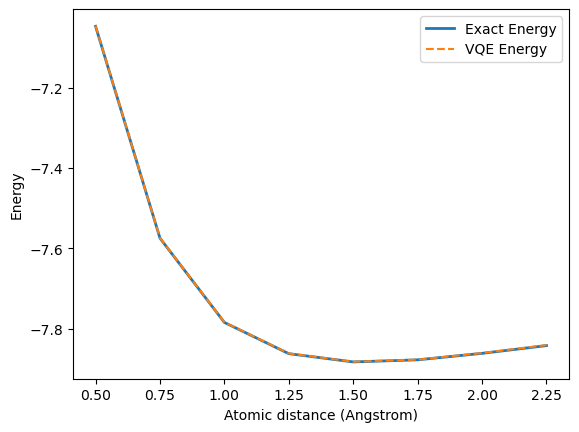

In [91]:
plt.plot(distances, exact_energies, label="Exact Energy", lw=2)
plt.plot(distances, vqe_energies, label="VQE Energy", ls='--')
plt.xlabel('Atomic distance (Angstrom)')
plt.ylabel('Energy')
plt.legend()
plt.show()

In [ ]:
backend = BasicAer.get_backend("statevector_simulator")
distances = np.arange(0.5, 2.5, 0.25)
exact_energies = []
vqe_energies = []
optimizer = SLSQP(maxiter=20)

# pylint: disable=undefined-loop-variable
for dist in distances:
    (qubit_op, num_particles, num_spin_orbitals,
                             problem, converter) = get_qubit_op(dist)
    result = excited_solver(problem,converter)
    
    exact_energies.append(result.total_energies)

    var_form = UCCSD(
        problem.num_spatial_orbitals,
        problem.num_particles,
        converter,
        initial_state=HartreeFock(
            problem.num_spatial_orbitals,
            problem.num_particles,
            converter,
        ),
    )


    estimator = Estimator()
    sampler = Sampler()
    fidelity = ComputeUncompute(sampler)
    betas = [33, 33, 33]

    vqe_solver = VQD(Estimator(), fidelity, ansatz=var_form, k=3, optimizer= SLSQP(maxiter=10), betas=betas)
    vqe_solver.initial_point = [0.0] * var_form.num_parameters

    calc = ExcitedStatesEigensolver(converter, vqe_solver)
    vqe_result = calc.solve(problem) 
        
    vqe_energies.append(vqe_result)
    print(f"Interatomic Distance: {np.round(dist, 2)}",
          f"VQE Result: {vqe_result}",
          f"Exact Energy: {exact_energies}")

print("All energies have been calculated")

In [3]:
from qiskit_aer.noise import NoiseModel, depolarizing_error
noise_model = NoiseModel()
error = depolarizing_error(0.02, 2)
noise_model.add_all_qubit_quantum_error(error, ['cx'])

noisy_estimator = AerEstimator(
    backend_options={
        "noise_model": noise_model,
    },
)

In [ ]:
backend = BasicAer.get_backend("statevector_simulator")
distances = np.arange(0.5, 2.5, 0.25)
exact_energies = []
vqe_energies = []
optimizer = SLSQP(maxiter=20)

# pylint: disable=undefined-loop-variable
for dist in distances:
    (qubit_op, num_particles, num_spin_orbitals,
     problem, converter) = get_qubit_op(dist)
    result = excited_solver(problem, converter)

    print(result.total_energies[0],
          result.total_energies[1],
          result.total_energies[2])

    exact_energies.append(result.total_energies)

    var_form = UCCSD(
        problem.num_spatial_orbitals,
        problem.num_particles,
        converter,
        initial_state=HartreeFock(
            problem.num_spatial_orbitals,
            problem.num_particles,
            converter,
        ),
    )

    estimator = Estimator()
    sampler = Sampler()
    fidelity = ComputeUncompute(sampler)
    betas = [33, 33, 33]

    vqe_solver = VQD(Estimator(), fidelity, ansatz=var_form,
                     k=3, optimizer=COBYLA(maxiter=100), betas=betas)
    vqe_solver.initial_point = [0.0] * var_form.num_parameters

    calc = ExcitedStatesEigensolver(converter, vqe_solver)
    vqe_result = calc.solve(problem)

    print(vqe_result.total_energies[0],
          vqe_result.total_energies[1],
          vqe_result.total_energies[2])

    print()

    vqe_energies.append(vqe_result.total_energies)

    print(f"Interatomic Distance: {np.round(dist, 2)}",
          f"VQE Result: {vqe_result.total_energies}",
          f"Exact Energy: {result.total_energies}")

print("All energies have been calculated")


In [ ]:
plt.figure(figsize=(9, 9))
plt.plot(distances, exact_energies, label=[
         "Exact Energy Gs", "Exact Energy 1st ES", "Exact Energy 2nd ES"], lw=2)
plt.plot(distances, vqe_energies, label=[
         "VQE Energy GS", "VQE Energy 1s ES", "VQE Energy 2nd ES"], ls='--')
plt.xlabel('Atomic distance (Angstrom)')
plt.ylabel('Energy')
plt.legend()
plt.show()


In [ ]:
plt.figure(figsize=(9, 9))
plt.plot(distances, np.abs(np.array(exact_energies)-np.array(vqe_energies)), label=[
         "Energy Difference Gs", "Energy Difference 1st ES", "Energy Difference 2nd ES"], lw=2)
plt.xlabel('Atomic distance (Angstrom)')
plt.ylabel('Energy')
plt.legend()
plt.show()


In [ ]:
dist = 1.56
(qubit_op, num_particles, num_spin_orbitals,
                            problem, converter) = get_qubit_op(dist)
result = excited_solver(problem,converter, k=2)

In [17]:
res = []
for r in [1, 2, 3, 4]:
    aux = []
    for ent in ['linear', 'circular']:
        var_form = TwoLocal(problem.num_spin_orbitals, rotation_blocks=[
                            'rx', 'rz', 'rx'], entanglement_blocks=['cx'], entanglement=ent, reps=r)


        sampler = Sampler()
        fidelity = ComputeUncompute(sampler)
        betas = [33, 33, 33]

        vqe_solver = VQD(noisy_estimator, fidelity, ansatz=var_form, k=2, optimizer= COBYLA(maxiter=100), betas=betas)

        calc = ExcitedStatesEigensolver(converter, vqe_solver)
        vqe_result = calc.solve(problem) 
        print(vqe_result.total_energies)
        aux.append(vqe_result.total_energies)
    res.append(aux)


[-7.8496324  -7.51632562]
[-7.39910176 -6.39756446]
[-6.95180018 -6.65375505]
[-6.27648332 -6.25359786]
[-6.36859075 -6.26028786]
[-6.22889488 -6.04089753]
[-6.35963622 -6.28763931]
[-5.95525661 -5.95890253]


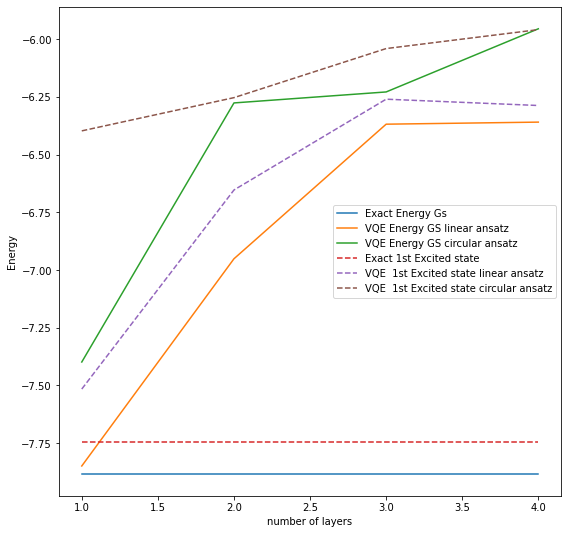

In [37]:
distances = [1, 2, 3, 4]

plt.figure(figsize=(9, 9))
plt.plot(distances, [result.total_energies[0]] * len(distances), label=
         "Exact Energy Gs", ls='-')
plt.plot(distances, [res[i][0][0] for i in range(len(distances))], label=
         "VQE Energy GS linear ansatz", ls='-')
plt.plot(distances, [res[i][1][0] for i in range(len(distances))], label=
         "VQE Energy GS circular ansatz", ls='-')


plt.plot(distances, [result.total_energies[1]] *
         len(distances), label="Exact 1st Excited state", ls='--')
plt.plot(distances, [res[i][0][1] for i in range(
    len(distances))], label="VQE  1st Excited state linear ansatz", ls='--')
plt.plot(distances, [res[i][1][1] for i in range(
    len(distances))], label="VQE  1st Excited state circular ansatz", ls='--')

plt.xlabel('number of layers')
plt.ylabel('Energy')
plt.legend()
plt.show()


In [15]:
print(vqe_result.total_energies)
print(result.total_energies)

[-6.0384688  -6.00880878]
[-7.88251126 -7.74697718]


## 2.2 - Spectrum as function of the bond length

Compute the the GS and the first two excited states energies as function of the bond length.
Consider bond lengths in a range of $0.5~\unicode{x212B}$ and $2.5~\unicode{x212B}$ in intervals of $0.25~\unicode{x212B}$.

Compare the exact energies with those obtained through variational methods.

### Compute the energy of the GS and the next two excited states as function of the bond length. Can you (roughly) identify a candidate for the equilibrium bond length of the molecule?

## 2.3 - Imperfect devices

In the current noisy intermediate-scale quantum (NISQ) devices, the operations are imperfect and the errors accumulate along the execution of the circuit.
In particular, two-qubit operations, such as the CNOT, have the highest errors.

Here, we consider a more realistic scenario in which we simulate noisy two-qubit gates.
Create a noise model considering an error rate of $0.02$ in CNOT operations.
See the example code below:

```python
from qiskit_aer.noise import NoiseModel, depolarizing_error
noise_model = NoiseModel()
error = depolarizing_error(0.02, 2)
noise_model.add_all_qubit_quantum_error(error, ['cx'])
```

Compute the GS and first excited state energies as function of the bond length with the noisy simulation and compare it with the exact values.

Large circuits with many entangling gates will accumulate many errors, damaging the performance.
Try different ansatze to find the best trade-off between expressivity and errors (even if they do not preserve the particle number).
You can also use other Hamiltonian mappings that may be more convenient for the task.

Report the best results you find and briefly describe your findings (what worked best and what did not).

### Compute the GS and first excited state energies as function of the bond length in the noisy simulation.

_Knowing the electronic properties of the shell, you've managed to stabilize it and cool it a bit in the process.
This has given you some time to work and find a solution._

_We're all slightly less likely to die. Great!_

----

_With the stabilized shell, you can finally run a scanner and obtain a clear diagnosis of the core.
It appears that someone must've momentarily slept on the core moderators, producing a high temperature spike that has caused the LiH from the shell to release hydrogen gas (H$_2$)._

_This has ignited a side fusion reaction of the hydrogen, that further raises the temperature, releasing more H$_2$ to the mixture.
NOT GOOD!
This'll get out of control in a moment.
You must deploy the H collectors (if they work) before this gets out of control!_

_With the apparent mess, the collector memories have been reset.
Given the situation, you feel lucky to even find some functional collectors._ 

# 3. MASTER THE QUANTUM SIMULATION SHENANIGANS  <a class="anchor" id="3"></a> [[↑]](#0)

_Seedis is on a rampage: "Let's go bois and gals, these collectors won't get fixed by themselves! We just need to load the H$_2$ data to stop the retroalimentation loop."_

> It's time to test the power of a real quantum computer.
In this task you will use an actual quantum computer to find the ground state of the H$_2$ molecule. 

Using one of the quantum computers from [IBM Quantum](https://quantum-computing.ibm.com/), find the GS energy of the hydrogen molecule H$_2$ for a bond distance of $0.735~\unicode{x212B}$.
Use all the tools at your disposal to obtain the best possible result and try to make the most efficient use of resources through [Qiskit runtime](https://quantum-computing.ibm.com/lab/docs/iql/runtime/).

We recommend looking carefully at both runtime (the faster, the more you can experiment) and error sources (self-explanatory!).
Here, we provide a few ideas to explore. However, you are not bound to implement any of these, you're completely free to do whatever you want to improve the simulation.

Consider:
- Looking into the hardware architecture to identify the best qubits to use
- Calibrate the qubits with [Qiskit Pulse](https://qiskit.org/textbook/ch-quantum-hardware/calibrating-qubits-pulse.html)
- Tailor the ansatz to the hardware
- Implement an adaptive algorithm to reduce the ansatz size
- Implement error mitigation techniques like [measurement error mitigation](https://qiskit.org/textbook/ch-quantum-hardware/measurement-error-mitigation.html), [randomized compiling](https://qiskit.org/documentation/stable/0.32/stubs/qiskit.ignis.verification.QOTP.html), and [others](https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials/Error-Suppression-and-Error-Mitigation.html)
- Parallelize operations and measurements
- Explore [dynamic circuit](https://quantum-computing.ibm.com/services/programs/docs/runtime/manage/systems/dynamic-circuits/Introduction-To-Dynamic-Circuits) techniques
- Explore more advanced optimization schemes (e.g., [Quantum Natural SPSA](https://qiskit.org/documentation/stubs/qiskit.algorithms.optimizers.QNSPSA.html))

In [134]:
from qiskit import IBMQ
from qiskit.visualization import plot_histogram
from qiskit import transpile
from qiskit_ibm_provider import IBMProvider
import math
from typing import List, Optional

from qiskit import transpile, QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.result import marginal_counts

import warnings
warnings.filterwarnings("ignore")

pi = math.pi


IBMProvider.save_account(
    overwrite=True, token='f14275a70ac4f1be11f32e1c7785ffbc5743123501970ec0e12d971d689ede650eacb532793ee63952e57f71a6e73fa1b30d2318868fc7ea58d24784e9e2bdcd')


#backend = provider.get_backend('ibmq_16_melbourne')
#print('Melbourne machine')
#backend = provider.get_backend('ibmq_qasm_simulator')

# provider = IBMProvider()


# IBMQ.save_account(
#     'f14275a70ac4f1be11f32e1c7785ffbc5743123501970ec0e12d971d689ede650eacb532793ee63952e57f71a6e73fa1b30d2318868fc7ea58d24784e9e2bdcd')
IBMQ.load_account()

hub = "ibm-q-community" #"ibm-q"  # "ibm-q-community"
group = "digiq-icfo-hack" #'open'  # "digiq-icfo-hack"
project = "main"
# provider = IBMQ.get_provider(group=group)


backend_name = "ibmq_jakarta"  # 7 qubits
#backend_name = "ibmq_guadalupe" # 16 qubits
provider = IBMQ.get_provider(hub=hub, group=group, project=project)


backend = provider.get_backend(backend_name)
# backend = provider.get_backend(backend_name, instance=f"{hub}/{group}/{project}")
# <IBMQBackend('ibmq_jakarta') from IBMQ(hub='ibm-q', group='open', project='main') >,

shots: int = 1024  # Number of shots to run each circuit for




ibmqfactory.load_account:WARNING:1970-01-06 06:54:36,192: Credentials are already in use. The existing account in the session will be replaced.


In [135]:
from qiskit.algorithms import VQD


def get_qubit_op(dist):
    molecule = MoleculeInfo(
        # Coordinates in Angstrom
        symbols=["H", "H"],
        coords=[
            (0.0, 0.0, 0.0),
            (dist, 0.0, 0.0)
        ],
        multiplicity=1,  # = 2*spin + 1
        charge=0,
    )

    driver = PySCFDriver.from_molecule(molecule=molecule, basis="sto3g")

    es_problem = driver.run()

    transformer = FreezeCoreTransformer(
        freeze_core=True, remove_orbitals=[-3, -2])

    problem = transformer.transform(es_problem)

    num_spin_orbitals = problem.num_spin_orbitals
    num_particles = problem.num_particles

    mapper = ParityMapper()  # Set Parity Mapper
    # mapper = JordanWignerMapper()
    hamiltonian = problem.hamiltonian.second_q_op()
    # Do two qubit reduction
    converter = QubitConverter(mapper, two_qubit_reduction=True)
    # reducer = TwoQubitReduction(num_particles)
    qubit_op = converter.convert(hamiltonian, num_particles=num_particles)
    # qubit_op = reducer.convert(qubit_op)

    return qubit_op, num_particles, num_spin_orbitals, problem, converter

qubit_op, num_particles, num_spin_orbitals, problem, converter = get_qubit_op(
    0.735)

var_form = TwoLocal(qubit_op.num_qubits, rotation_blocks=[
                    'rx', 'rz', 'rx'], entanglement_blocks=['cx'], entanglement='linear', reps=1)

In [138]:
from qiskit_nature.runtime import VQEClient

# in this first release, the optimizer must be specified as dictionary


initial_point = np.random.random(var_form.num_parameters)
runtime_vqe = VQEClient(
    ansatz=var_form,
    optimizer=COBYLA(maxiter=100),
    initial_point=initial_point,
    provider=provider,
    backend=backend,
    shots=1024,
    measurement_error_mitigation=True,
)  # use a complete measurement fitter for error mitigation


In [139]:
runtime_vqe_groundstate_solver = GroundStateEigensolver(converter, runtime_vqe)
runtime_vqe_result = runtime_vqe_groundstate_solver.solve(problem)


In [83]:
from qiskit.providers.ibmq import IBMQ
from qiskit.providers.aer import AerSimulator

from qiskit.providers.fake_provider import FakeGuadalupe, FakeGuadalupeV2

backend = FakeGuadalupeV2()


In [50]:
def get_qubit_op(dist):
    molecule = MoleculeInfo(
        # Coordinates in Angstrom
        symbols=["H", "H"],
        coords=[
            (0.0, 0.0, 0.0),
            (dist, 0.0, 0.0)
        ],
        multiplicity=1,  # = 2*spin + 1
        charge=0,
    )

    driver = PySCFDriver.from_molecule(molecule=molecule, basis="sto3g")

    es_problem = driver.run()

    transformer = FreezeCoreTransformer(
        freeze_core=True, remove_orbitals=[-3, -2])

    problem = transformer.transform(es_problem)

    num_spin_orbitals = problem.num_spin_orbitals
    num_particles = problem.num_particles

    mapper = ParityMapper()  # Set Parity Mapper
    # mapper = JordanWignerMapper()
    hamiltonian = problem.hamiltonian.second_q_op()
    # Do two qubit reduction
    converter = QubitConverter(mapper, two_qubit_reduction=True)
    # reducer = TwoQubitReduction(num_particles)
    qubit_op = converter.convert(hamiltonian, num_particles=num_particles)
    # qubit_op = reducer.convert(qubit_op)

    return qubit_op, num_particles, num_spin_orbitals, problem, converter


In [84]:
from qiskit.algorithms import VQD

qubit_op, num_particles, num_spin_orbitals, problem, converter=get_qubit_op(dist)

var_form = TwoLocal(problem.num_spin_orbitals, rotation_blocks=[
                    'rx', 'rz', 'rx'], entanglement_blocks=['cx'], entanglement='linear', reps=1)

sampler = Sampler()
fidelity = ComputeUncompute(sampler)
betas = [33, 33, 33]

vqe_solver = VQD(quantum_instance=backend, ansatz=var_form,
                    k=2, optimizer=COBYLA(maxiter=100), betas=betas)

vqe_result =  vqe_solver.compute_eigenvalues(qubit_op)
# print(vqe_result.eigenstates)

capi_return is NULL
Call-back cb_calcfc_in__cobyla__user__routines failed.


KeyboardInterrupt: 

In [58]:
result = excited_solver(problem, converter, k=2)
print(result.total_energies)
print(vqe_result.eigenvalues.real)


[-0.98902217 -0.43102349]
[-1.29422388 -0.84900335]


In [66]:
var_form.decompose().draw()

┌──────────┐┌──────────┐┌──────────┐     ┌──────────┐┌──────────┐»
q_0: ┤ Rx(θ[0]) ├┤ Rz(θ[2]) ├┤ Rx(θ[4]) ├──■──┤ Rx(θ[6]) ├┤ Rz(θ[8]) ├»
     ├──────────┤├──────────┤├──────────┤┌─┴─┐├──────────┤├──────────┤»
q_1: ┤ Rx(θ[1]) ├┤ Rz(θ[3]) ├┤ Rx(θ[5]) ├┤ X ├┤ Rx(θ[7]) ├┤ Rz(θ[9]) ├»
     └──────────┘└──────────┘└──────────┘└───┘└──────────┘└──────────┘»
«     ┌───────────┐
«q_0: ┤ Rx(θ[10]) ├
«     ├───────────┤
«q_1: ┤ Rx(θ[11]) ├
«     └───────────┘

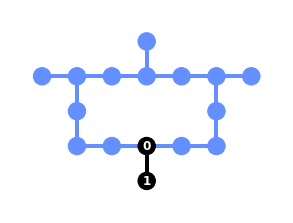

In [86]:
from qiskit import transpile
from qiskit.visualization import plot_circuit_layout

transpiled_circuit = transpile(
    var_form.decompose(), backend, optimization_level=1, initial_layout=[8,9])
plot_circuit_layout(transpiled_circuit, backend)
# print()
# transpiled_circuit.draw()


## Bonus: an extra atom

If you consider that you have obtained a competitive result for H$_2$, you can tackle the H$_3^+$ molecule. It has the same number of electrons, but you will have to consider more orbitals (which requires more qubits).

The three hydrogen atoms form an equilater triangle with bond length $0.986~\unicode{x212B}$.

_You upload the simulation results to the few functional collectors.
With more faith than expectations, you deploy them to clear the core chamber hoping they will collect enough H$_2$ before they fry._

_Alea iacta est._

_This gives you a brief moment to think about the possible outcomes.
It does not look good, and you look into your teamates eyes.
You feel pure respect and joy to be in such an amazing unit._

_The last collector is down.
Your heart stops for a moment, right before you see the temperature starting to drop.
You did it!
Well, technically you still need to stabilize the core, but the biggest threat has been neutralized.
The rest is just a rutinary protocol._

_Congratulations!
You should all be proud of your hard work during this intense weekend.
It surely was an entertaining crisis to handle!_

## REFERENCES <a class="anchor" id="REF"></a> [[↑]](#0)

[1] Franchini, Fabio. An introduction to integrable techniques for one-dimensional quantum systems. Vol. 940. Cham: Springer International Publishing, 2017. ([url](https://arxiv.org/abs/1609.02100))

[2] Kandala, Abhinav, et al. "Hardware-efficient variational quantum eigensolver for small molecules and quantum magnets." Nature 549.7671 (2017): 242-246. ([url](https://arxiv.org/abs/1704.05018))

[3] Higgott, Oscar, Daochen Wang, and Stephen Brierley. "Variational quantum computation of excited states." Quantum 3 (2019): 156. ([url](https://quantum-journal.org/papers/q-2019-07-01-156/))